# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [9]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [10]:
# Your code here - Manipulate column names
spec_chars = ['½','-',' ','®','™','.',"'"]

for char in spec_chars:
    df.columns = [col.replace(char, '_') for col in df.columns]

df.columns = [col.replace('+', 'plus') for col in df.columns]


In [11]:
# Your code here - Define the target and predictors
X = df.drop('list_price', axis=1)
y = df.list_price

In [12]:
# Your code here - Split into train and test
train, test = train_test_split(df, shuffle=True)

In [13]:
# Your code here - Fit the actual model
x_cols = list(X.columns)
outcome = 'list_price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     539.9
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:39:33   Log-Likelihood:                -40407.
No. Observations:                8152   AIC:                         8.100e+04
Df Residuals:                    8057   BIC:                         8.167e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7405      1.685     38.416      0.000      61.437      68.044
piece_count                                         74.7385      0.888     84.160      0.000      72.998      76.479
num_reviews                                          6.0955      0.663      9.195      0.000       4.796       7.395
play_star_rating                                     4.8357      0.609      7.939      0.000       3.642       6.030
star_rating                                         -0.6795      0.700     -0.970      0.332      -2.052       0.693
val_star_rating                                     -8.5016      0.630    -13.488      0.000      -9.737      -7.266
ages_10plus                                        123.0582      6.490     18.962      0.000     110.337     135.780
ages_10_14                                         -22.7506      9.334     -2.437      0.015     -41.048      -4.453
ages_10_16                                         -10.2779      3.848     -2.671      0.008     -17.821      -2.735
ages_10_21                                          51.8388      7.266      7.134      0.000      37.596      66.082
ages_11_16                                         -21.6592      5.843     -3.707      0.000     -33.114     -10.204
ages_12plus                                         75.4191      5.486     13.747      0.000      64.665      86.174
ages_12_16                                         -59.7635      6.870     -8.700      0.000     -73.230     -46.297
ages_14plus                                         26.7766      3.979      6.729      0.000      18.976      34.577
ages_16plus                                         38.9515      6.029      6.461      0.000      27.134      50.769
ages_1__3                                           -9.5539      2.362     -4.044      0.000     -14.185      -4.923
ages_1__5                                           -4.1185      2.874     -1.433      0.152      -9.752       1.515
ages_2_5                                            14.7207      1.640      8.973      0.000      11.505      17.936
ages_4plus                                         -18.3091      6.055     -3.024      0.003     -30.178      -6.441
ages_4_7                                            -6.5745      3.140     -2.094      0.036     -12.729      -0.420
ages_4_99                                           -3.4921      3.449     -1.012      0.311     -10.254       3.270
ages_5plus                                         -10.1168      2.982     -3.393      0.001     -15.962      -4.271
ages_5_12                                          -35.6036      3.079    -11.564      0.000     -41.639     -29.568
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [14]:
# Your code here - Remove features which do not appear to be statistically relevant
df2 = df.drop(labels=['star_rating', 'ages_1__5', 'ages_4_99', 'ages_5_8', 'ages_7plus', 'ages_9_16',
                     'theme_name_Angry_Birds_', 'theme_name_Creator_3_in_1', 'theme_name_DC_Super_Hero_Girls',
                     'theme_name_DUPLO_', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Juniors',
                     'theme_name_Jurassic_Park_Velociraptor_Chase', 'theme_name_MINDSTORMS_',
                     'theme_name_NEXO_KNIGHTS_', 'theme_name_Power_Functions', 'theme_name_Pteranodon_Chase',
                     'theme_name_Speed_Champions', 'theme_name_THE_LEGO__BATMAN_MOVIE', 'theme_name_Technic',
                     'country_AT', 'country_AU', 'country_CH', 'country_GB', 'country_IE', 'country_IT',
                     'review_difficulty_Very_Easy'], axis=1)

In [15]:
# Your code here - Refit the model
train, test = train_test_split(df2, shuffle=True)

In [16]:
X2 = df2.drop('list_price', axis=1)
x_cols = list(X2.columns)
outcome = 'list_price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     726.6
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:39:33   Log-Likelihood:                -40516.
No. Observations:                8152   AIC:                         8.118e+04
Df Residuals:                    8078   BIC:                         8.170e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.8313      3.142     20.636      0.000      58.673      70.990
piece_count                                         75.5684      0.868     87.036      0.000      73.866      77.270
num_reviews                                          6.5508      0.671      9.762      0.000       5.235       7.866
play_star_rating                                     4.4473      0.524      8.489      0.000       3.420       5.474
val_star_rating                                     -9.3582      0.497    -18.811      0.000     -10.333      -8.383
ages_10plus                                         91.8124      5.419     16.942      0.000      81.189     102.435
ages_10_14                                         -19.6436      9.516     -2.064      0.039     -38.297      -0.991
ages_10_16                                         -10.4502      4.484     -2.330      0.020     -19.240      -1.660
ages_10_21                                          44.0520      4.076     10.808      0.000      36.062      52.042
ages_11_16                                         -11.8878      5.857     -2.030      0.042     -23.369      -0.406
ages_12plus                                         57.7322      6.571      8.786      0.000      44.851      70.613
ages_12_16                                         -60.3002      7.093     -8.502      0.000     -74.203     -46.397
ages_14plus                                         26.8983      5.154      5.218      0.000      16.794      37.002
ages_16plus                                         34.2421      6.986      4.901      0.000      20.547      47.937
ages_1__3                                           -6.0925      3.876     -1.572      0.116     -13.691       1.506
ages_2_5                                            17.0479      3.094      5.510      0.000      10.983      23.112
ages_4plus                                         -15.8975      9.420     -1.688      0.092     -34.363       2.568
ages_4_7                                            -4.2669      3.188     -1.338      0.181     -10.517       1.983
ages_5plus                                          -8.7348      3.187     -2.741      0.006     -14.982      -2.487
ages_5_12                                          -32.3126      3.604     -8.966      0.000     -39.377     -25.248
ages_6plus                                         -23.9646      6.101     -3.928      0.000     -35.923     -12.006
ages_6_12                                          -18.5983      3.000     -6.200      0.000     -24.478     -12.718
ages_6_14                                           -4.7306      4.584     -1.032      0.302     -13.717       4.256
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [17]:
# Your code here - Continue to refine the model
df3 = df2.drop(labels=['ages_10_14', 'ages_1__3', 'ages_4plus', 'ages_4_7', 'ages_6_14',
                     'ages_8plus', 'ages_9_14', 'theme_name_DC_Comics__Super_Heroes',
                     'theme_name_Stygimoloch_Breakout', 'country_DE', 'country_ES',
                     'country_FR', 'country_LU', 'country_PL', 'country_PT', 'review_difficulty_Easy',
                     'review_difficulty_unknown'], axis=1)

In [49]:
# Your code here - Refit the model
X3 = df3.drop('list_price', axis=1)
x_cols = list(X3.columns)
outcome = 'list_price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     942.6
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:58:33   Log-Likelihood:                -40540.
No. Observations:                8152   AIC:                         8.119e+04
Df Residuals:                    8095   BIC:                         8.159e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7324      1.219     53.105      0.000      62.343      67.122
piece_count                                         75.6831      0.836     90.515      0.000      74.044      77.322
num_reviews                                          6.2342      0.631      9.887      0.000       4.998       7.470
play_star_rating                                     4.5913      0.519      8.843      0.000       3.573       5.609
val_star_rating                                     -9.4124      0.491    -19.170      0.000     -10.375      -8.450
ages_10plus                                         95.6611      4.755     20.120      0.000      86.341     104.981
ages_10_16                                          -5.6115      3.630     -1.546      0.122     -12.727       1.505
ages_10_21                                          47.5693      3.222     14.765      0.000      41.254      53.885
ages_11_16                                          -7.3106      5.210     -1.403      0.161     -17.524       2.903
ages_12plus                                         59.4567      5.771     10.303      0.000      48.145      70.769
ages_12_16                                         -55.2283      6.529     -8.459      0.000     -68.026     -42.430
ages_14plus                                         33.3104      4.241      7.855      0.000      24.998      41.623
ages_16plus                                         40.3812      6.171      6.544      0.000      28.285      52.478
ages_2_5                                            20.9269      1.829     11.441      0.000      17.341      24.513
ages_5plus                                          -7.6109      2.865     -2.657      0.008     -13.227      -1.995
ages_5_12                                          -27.5600      2.574    -10.708      0.000     -32.605     -22.515
ages_6plus                                         -19.4092      5.560     -3.491      0.000     -30.308      -8.510
ages_6_12                                          -13.2615      1.566     -8.468      0.000     -16.332     -10.191
ages_7_12                                          -12.7185      1.953     -6.513      0.000     -16.547      -8.890
ages_7_14                                           -9.4615      1.664     -5.686      0.000     -12.723      -6.200
ages_8_12                                          -13.9748      2.551     -5.478      0.000     -18.975      -8.974
ages_8_14                                           -7.9728      1.653     -4.824      0.000     -11.212      -4.733
ages_9plus                                          87.8467      9.833      8.933      0.000      68.570     107.123
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

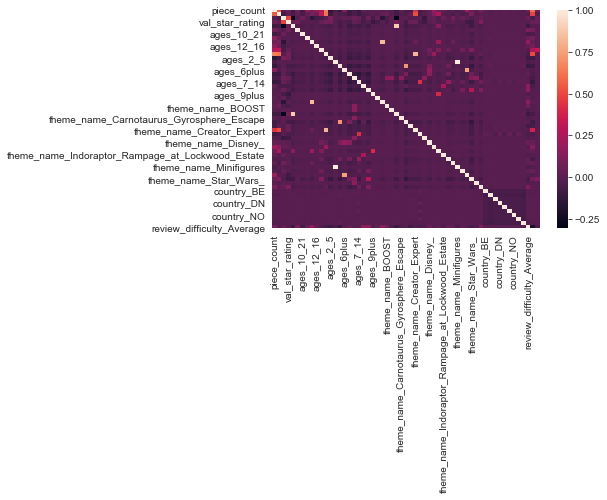

In [50]:
# Your code here - Code a way to identify multicollinearity
X3_corr = X3.corr()
sns.heatmap(X3_corr)

In [51]:
# Find the variance inflation factor (VIF) for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 4.362152825592865),
 ('num_reviews', 2.563796805958325),
 ('play_star_rating', 1.7800424418636203),
 ('val_star_rating', 1.5937564488050384),
 ('ages_10plus', 7.0148257317749625),
 ('ages_10_16', 1.1157309867467116),
 ('ages_10_21', 1.0511087278662372),
 ('ages_11_16', 1.1316583693373095),
 ('ages_12plus', 5.829765831599364),
 ('ages_12_16', 1.1463885654834036),
 ('ages_14plus', 1.9976566443168986),
 ('ages_16plus', 8.803895113469654),
 ('ages_2_5', 1.1794497396744306),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1066446420799787),
 ('ages_6plus', 2.6542696895815516),
 ('ages_6_12', 1.6431421085214948),
 ('ages_7_12', 1.3930013321003305),
 ('ages_7_14', 1.6025944015750457),
 ('ages_8_12', 1.217657833353577),
 ('ages_8_14', 1.506145820408701),
 ('ages_9plus', 1.3935501248909474),
 ('ages_9_12', 1.0157934572425216),
 ('theme_name_Architecture', 5.028328170201898),
 ('theme_name_BOOST', 1.0590569542332167),
 ('theme_name_Blue_s_Helicopter_Pursuit', 1.039186297614492),
 ('theme

Based on VIF, should remove ages_10plus, ages_12plus, ages_16plus, ages_5plus, theme_name_Architecture, theme_name_BrickHeadz, theme_name_Minifigures

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [54]:
# Your code here - remove multicollinear features
df4 = df3.drop(labels=['ages_10plus', 'ages_12plus', 'ages_16plus', 'ages_5plus', 'theme_name_Architecture',
                      'theme_name_BrickHeadz', 'theme_name_Minifigures'], axis=1)

In [55]:
# Your code here - Refit model with subset features
X4 = df4.drop('list_price', axis=1)
x_cols = list(X4.columns)
outcome = 'list_price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     984.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:                -40788.
No. Observations:                8152   AIC:                         8.168e+04
Df Residuals:                    8101   BIC:                         8.204e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5805      1.054     62.211      0.000      63.514      67.647
piece_count                                         78.2645      0.668    117.116      0.000      76.954      79.574
num_reviews                                          5.8309      0.603      9.669      0.000       4.649       7.013
play_star_rating                                     5.5175      0.486     11.353      0.000       4.565       6.470
val_star_rating                                    -10.6550      0.483    -22.043      0.000     -11.602      -9.707
ages_10_16                                          -9.4085      3.609     -2.607      0.009     -16.483      -2.334
ages_10_21                                          47.4978      3.280     14.480      0.000      41.068      53.928
ages_11_16                                         -16.4356      5.118     -3.212      0.001     -26.467      -6.404
ages_12_16                                         -66.7006      6.344    -10.515      0.000     -79.136     -54.266
ages_14plus                                         15.7841      3.745      4.215      0.000       8.443      23.125
ages_2_5                                            21.3612      1.792     11.918      0.000      17.848      24.875
ages_5_12                                          -27.7289      2.592    -10.697      0.000     -32.810     -22.648
ages_6plus                                         -20.6326      5.699     -3.620      0.000     -31.805      -9.460
ages_6_12                                          -14.5162      1.517     -9.569      0.000     -17.490     -11.543
ages_7_12                                          -13.4671      1.944     -6.929      0.000     -17.277      -9.657
ages_7_14                                           -9.9857      1.634     -6.111      0.000     -13.189      -6.782
ages_8_12                                          -15.1136      2.533     -5.967      0.000     -20.079     -10.148
ages_8_14                                           -9.7937      1.632     -6.003      0.000     -12.992      -6.595
ages_9plus                                          20.4357      9.410      2.172      0.030       1.989      38.882
ages_9_12                                          -26.6096      6.516     -4.084      0.000     -39.383     -13.837
theme_name_BOOST                                    81.3446     11.125      7.312      0.000      59.537     103.152
theme_name_Blue_s_Helicopter_Pursuit                22.5905      9.509      2.376      0.018       3.951      41.230
theme_name_Carnotaurus_Gyrosphere_Escape            45.1793      8.957      5.044      0.000      27.622      62.736
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [56]:
import statsmodels.api as sm
import scipy.stats as stats

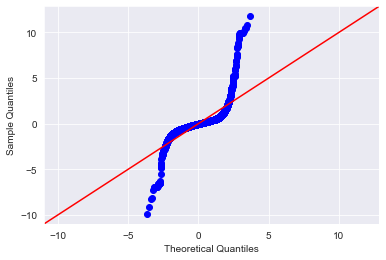

In [70]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

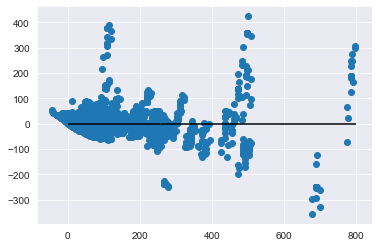

In [77]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.hlines(y=0, xmin=0, xmax=800)


> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [78]:
# Your code here - Check for outliers
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, y.quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88


In [79]:
# Your code here: looks like I should be able to remove outliers above 200 from list_price

# Remove extreme outliers (from df4)
subset = df4[df4['list_price'] < 200]
print('Percent removed:',(len(df4) - len(subset))/len(df4))

# Rerun the model
outcome = 'list_price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()



Percent removed: 0.059153633854645817


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1368.
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:15:09   Log-Likelihood:                -41915.
No. Observations:               10227   AIC:                         8.393e+04
Df Residuals:                   10176   BIC:                         8.430e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.3153      0.423    147.344      0.000      61.486      63.144
piece_count                                         78.5168      0.544    144.326      0.000      77.450      79.583
num_reviews                                          0.1340      0.275      0.487      0.626      -0.406       0.674
play_star_rating                                     2.8965      0.174     16.682      0.000       2.556       3.237
val_star_rating                                     -5.2136      0.174    -29.977      0.000      -5.555      -4.873
ages_10_16                                           1.2093      1.333      0.908      0.364      -1.403       3.821
ages_10_21                                          30.5698      1.196     25.552      0.000      28.225      32.915
ages_11_16                                         -65.4202      2.746    -23.825      0.000     -70.803     -60.038
ages_12_16                                           5.8933      4.156      1.418      0.156      -2.254      14.041
ages_14plus                                        -13.5435      2.573     -5.263      0.000     -18.587      -8.500
ages_2_5                                            24.3437      0.635     38.349      0.000      23.099      25.588
ages_5_12                                          -23.4880      0.924    -25.431      0.000     -25.298     -21.678
ages_6plus                                         -24.8306      1.996    -12.441      0.000     -28.743     -20.918
ages_6_12                                          -10.5683      0.539    -19.605      0.000     -11.625      -9.512
ages_7_12                                           -8.2486      0.688    -11.996      0.000      -9.596      -6.901
ages_7_14                                           -7.4644      0.574    -13.011      0.000      -8.589      -6.340
ages_8_12                                           -7.2768      0.893     -8.148      0.000      -9.027      -5.526
ages_8_14                                           -1.0560      0.584     -1.809      0.071      -2.200       0.088
ages_9plus                                           9.6413      3.595      2.682      0.007       2.594      16.688
ages_9_12                                          -15.3984      2.250     -6.842      0.000     -19.810     -10.987
theme_name_BOOST                                    91.2156      4.307     21.177      0.000      82.772      99.659
theme_name_Blue_s_Helicopter_Pursuit                17.9707      3.254      5.522      0.000      11.591      24.350
theme_name_Carnotaurus_Gyrosphere_Escape            40.9979      3.262     12.569      0.000      34.604      47.392
theme_name_City                          

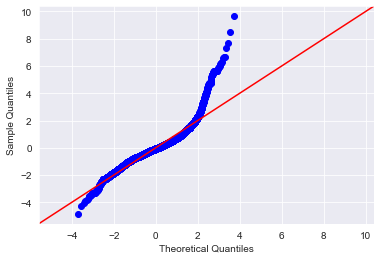

In [80]:
# Your code here - Check normality assumption

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

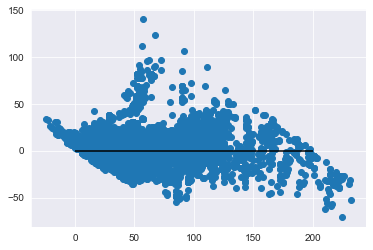

In [87]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.hlines(y=0, xmin=0, xmax=200)


In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 